In [1]:
import logging
logger = logging.getLogger(__name__)
for system in ['h5py._conv', 'matplotlib', 'PIL']:
     logging.getLogger(system).setLevel(logging.WARNING)
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sympy as sym
from sympy import LambertW as W
from sympy import exp, diff
sym.init_printing()

In [3]:
b1, q1, b2, q2 = sym.symbols('b1, q1, b2, q2', real=True, nonzero=True)
b0, q0, grad_b, grad_q= sym.symbols('b0, q0, ∇b, ∇q', real=True, nonzero=True)
γ, α, β = sym.symbols('γ, α, β', real=True, nonzero=True)
z, zc = sym.symbols('z, z_c', real=True)

In [4]:
# matching conditions from lower solution; b(zc-ε) = b1 = b(zc+ε)
b_minus = b1 = b0 + grad_b*zc
q_minus = q1 = q0 + grad_q*zc
grad_b_minus = grad_b
grad_q_minus = grad_q

In [5]:
# upper solution
P = b1 + γ*q1
Q = (b2-b1) + γ*(q2-q1)
C = P + (Q-β)*z
m = P + Q*z

T = C - W(α*γ*exp(α*C))/α
b = T + β*z
q = (m-b)/γ

In [6]:
grad_b_plus = diff(b, z).subs(z, zc)
grad_q_plus = diff(q, z).subs(z, zc)
b_plus = b.subs(z, zc)
q_plus = q.subs(z, zc)

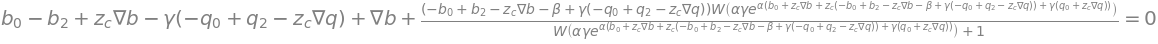

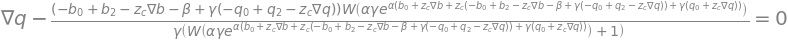

In [7]:
# matching conditions
#eq_gb = sym.Eq(grad_b_minus, grad_b_plus)
#eq_gq = sym.Eq(grad_q_minus, grad_q_plus)
#eq_b = sym.Eq(b_minus, b_plus)
#eq_q = sym.Eq(q_minus, q_plus)

eq_gb = sym.Eq(grad_b_minus - grad_b_plus, 0)
eq_gq = sym.Eq(grad_q_minus - grad_q_plus, 0)
eq_b = sym.Eq(b_minus - b_plus, 0)
eq_q = sym.Eq(q_minus - q_plus, 0)

eq_system = [eq_b, eq_q, eq_gb, eq_gq]
for eq in eq_system:
    display(eq)

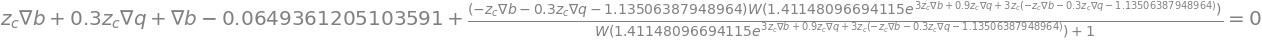

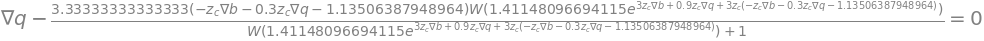

[Eq(-0.3*z_c*∇q - z_c*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964) - 1.2*z_c + LambertW(1.41148096694115*exp(3*z_c*∇b + 0.9*z_c*∇q + 3*z_c*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964)))/3 - 0.15, 0), Eq(z_c*∇q + 3.33333333333333*z_c*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964) - 3.33333333333333*z_c*(-z_c*∇b - 0.3*z_c*∇q + 0.0649361205103591) + 4.0*z_c - 1.11111111111111*LambertW(1.41148096694115*exp(3*z_c*∇b + 0.9*z_c*∇q + 3*z_c*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964))) + 0.5, 0), Eq(z_c*∇b + 0.3*z_c*∇q + ∇b - 0.0649361205103591 + (-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964)*LambertW(1.41148096694115*exp(3*z_c*∇b + 0.9*z_c*∇q + 3*z_c*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964)))/(LambertW(1.41148096694115*exp(3*z_c*∇b + 0.9*z_c*∇q + 3*z_c*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964))) + 1), 0), Eq(∇q - 3.33333333333333*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964)*LambertW(1.41148096694115*exp(3*z_c*∇b + 0.9*z_c*∇q + 3*z_c*(-z_c*∇b - 0.3*z_c*∇q - 1.13506387948964)))/(LambertW(1.41148096694115*exp(3*z_c*

In [ ]:
#soln = sym.solveset(eq_system, zc)
#α = 3
#β = 1.2
#γ = 0.3
import numpy as np
ΔT = -1
q_surface = 0.5
b0_bc = 0
b2_bc = 1.2 + ΔT
q0_bc = q_surface
q2_bc = np.exp(3*ΔT)


eq_gb = sym.Eq(grad_b_minus - grad_b_plus, 0)
eq_gq = sym.Eq(grad_q_minus - grad_q_plus, 0)
eq_b = sym.Eq(b_minus - b_plus, 0)
eq_q = sym.Eq(q_minus - q_plus, 0)

eq_system = []
eq_system_in = [eq_b, eq_q, eq_gb, eq_gq]
for eq_in in eq_system_in:
    eq = eq_in.subs(α, 3).subs(β, 1.2).subs(γ, 0.3).subs(b0, b0_bc).subs(q0, q0_bc).subs(b2, b2_bc).subs(q2, q2_bc)
    display(eq)
    eq_system.append(eq)
print(eq_system)
soln = sym.solve(eq_system, zc)

In [ ]:
soln